In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data import & shape analysis

In [2]:
data = pd.read_csv('../Data/breast-cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 32)

In [5]:
data.dtypes.value_counts()

float64    30
object      1
int64       1
dtype: int64

In [6]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Target

In [8]:
data['diagnosis'].value_counts()/data.shape[0]*100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

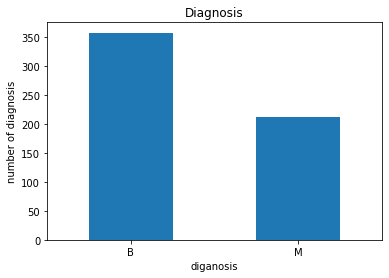

In [9]:
data['diagnosis'].value_counts().plot(kind='bar')
plt.title('Diagnosis')
plt.xticks(rotation="0")
plt.xlabel('diganosis')
plt.ylabel('number of diagnosis')
plt.show()

In [10]:
Malign = data[data['diagnosis']=="M"]
Begnin = data[data['diagnosis']=="B"]

In [11]:
for col in data.select_dtypes(include= np.float64).columns:
    print(f"##### {col} #####\n")
    print('STD')
    print(f"M:{np.std(Malign[col])}")
    print(f"B:{np.std(Begnin[col])}")

    print('Mean')
    print(f"M:{np.mean(Malign[col])}")
    print(f"B:{np.mean(Begnin[col])}")
    print(f"\n")

##### radius_mean #####

STD
M:3.1964056330766457
B:1.7780161836026669
Mean
M:17.46283018867925
B:12.14652380952381


##### texture_mean #####

STD
M:3.7705455401500347
B:3.9895252572260462
Mean
M:21.60490566037735
B:17.914761904761892


##### perimeter_mean #####

STD
M:21.803048370671174
B:11.79088895588649
Mean
M:115.36537735849062
B:78.07540616246497


##### area_mean #####

STD
M:367.06917361355346
B:134.09890905926832
Mean
M:978.3764150943397
B:462.79019607843145


##### smoothness_mean #####

STD
M:0.012578463947111302
B:0.013427232082988903
Mean
M:0.10289849056603775
B:0.09247764705882357


##### compactness_mean #####

STD
M:0.053860015547732405
B:0.03370265260130136
Mean
M:0.14518778301886787
B:0.08008462184873952


##### concavity_mean #####

STD
M:0.07484218633303398
B:0.04338126502909299
Mean
M:0.1607747169811321
B:0.04605762100840336


##### concave points_mean #####

STD
M:0.034292742507405924
B:0.01588648155109013
Mean
M:0.08799000000000004
B:0.025717406162464995


####

### Float Data

In [11]:
float_data = data.select_dtypes(include= np.float64)

#### Distribution


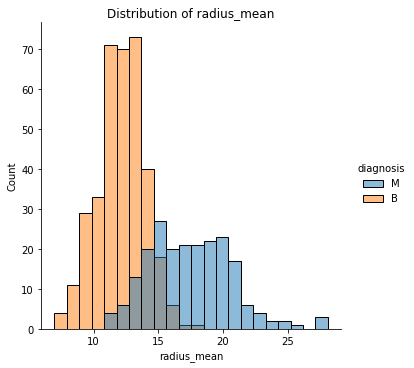

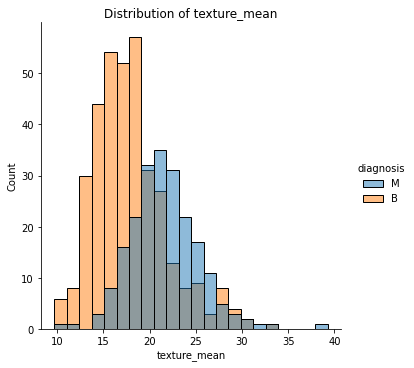

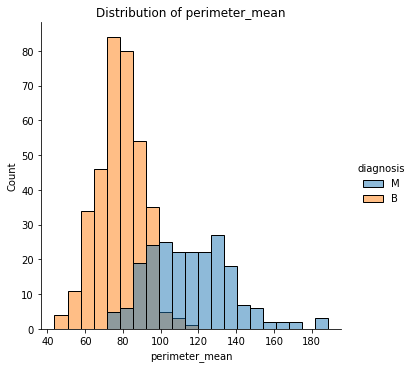

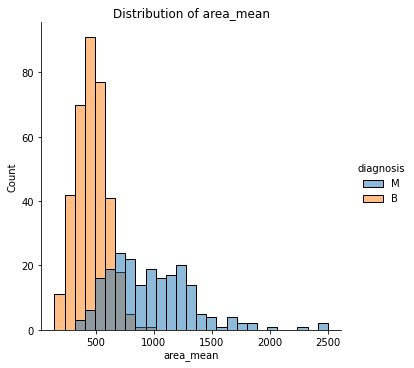

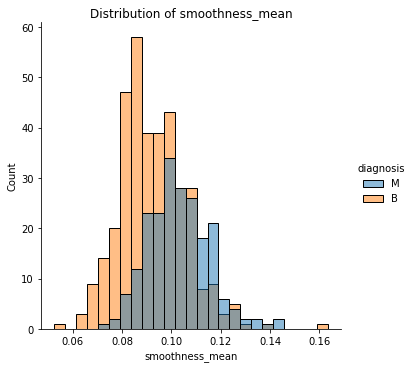

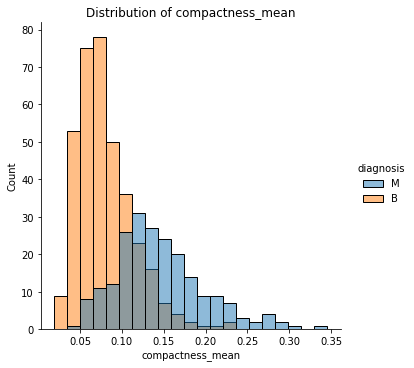

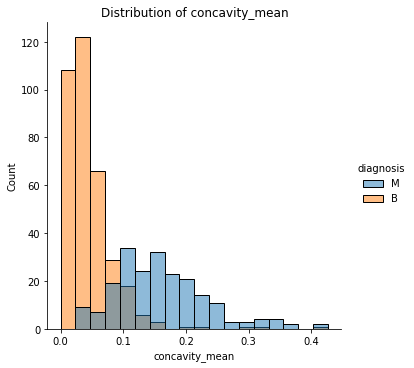

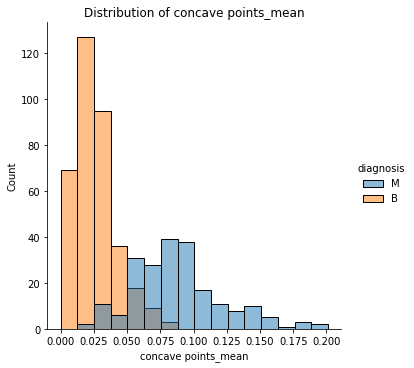

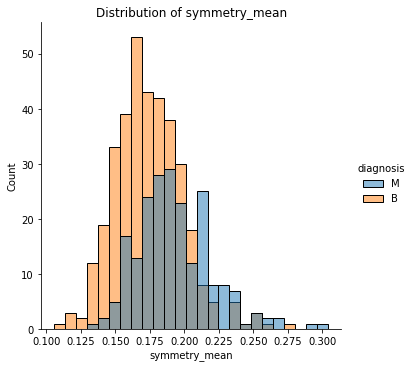

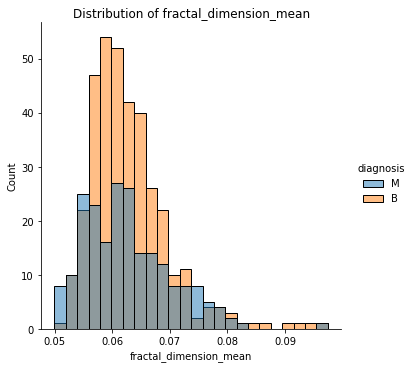

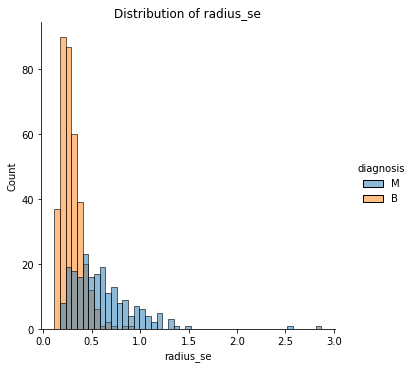

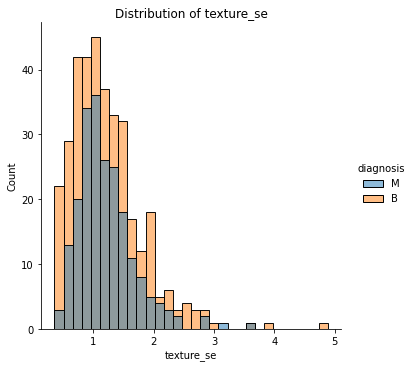

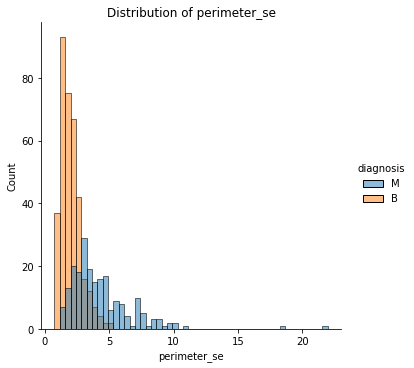

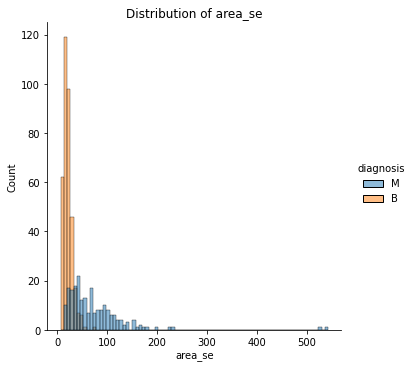

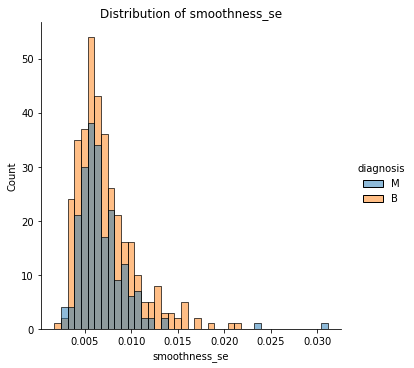

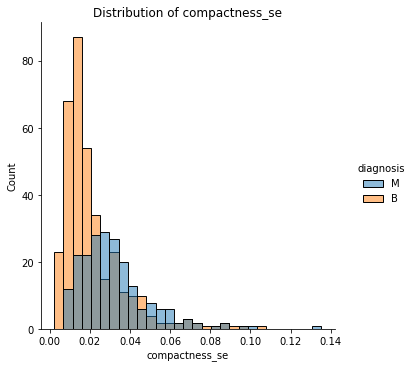

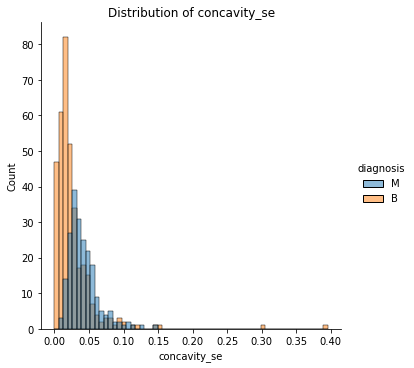

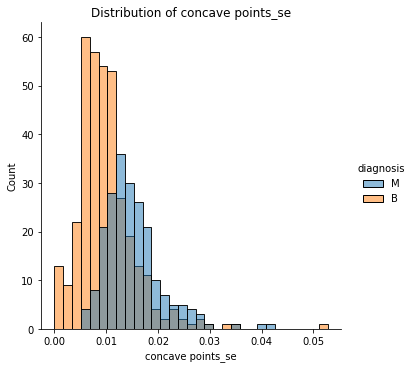

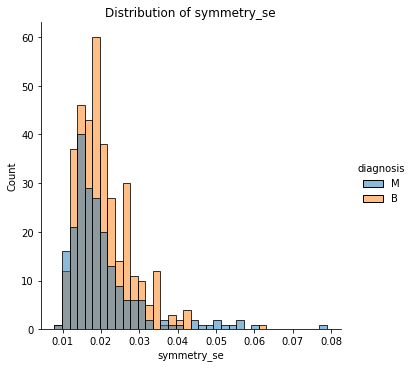

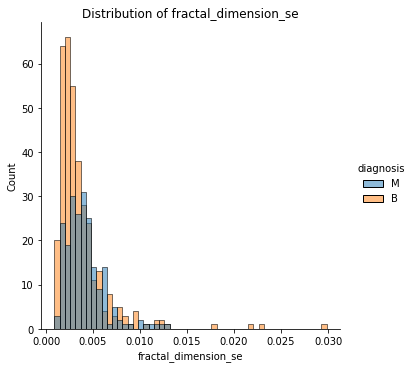

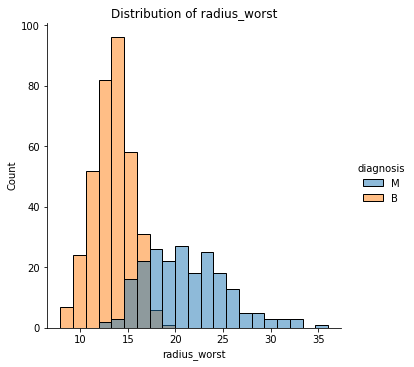

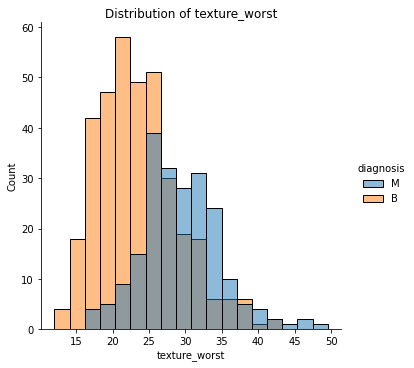

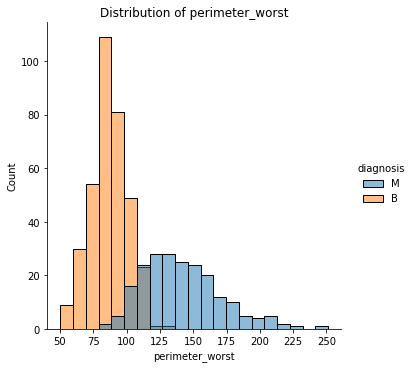

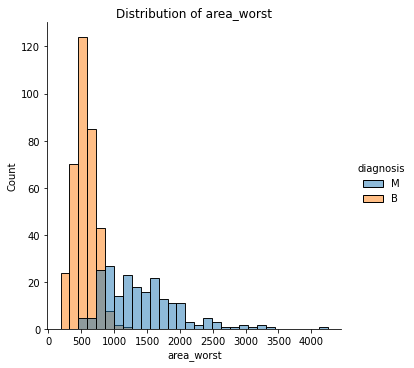

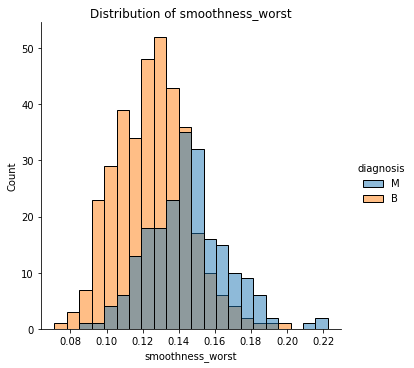

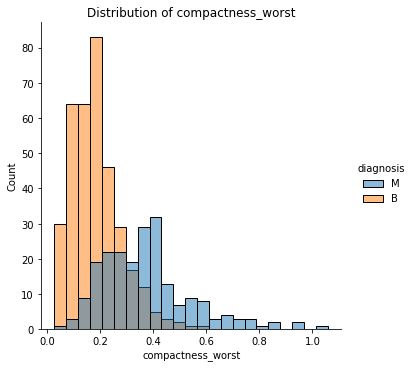

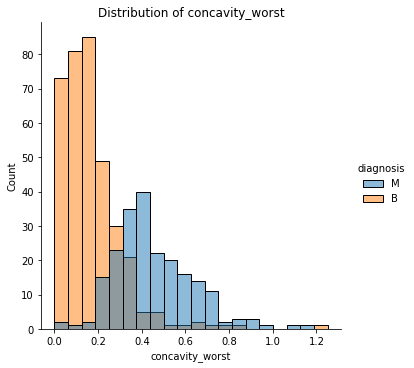

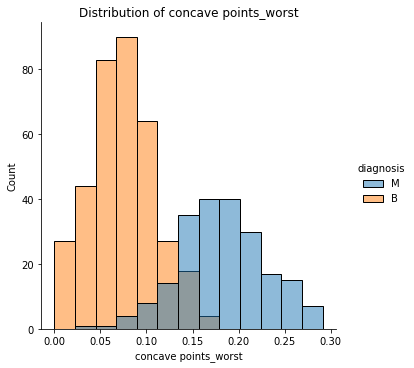

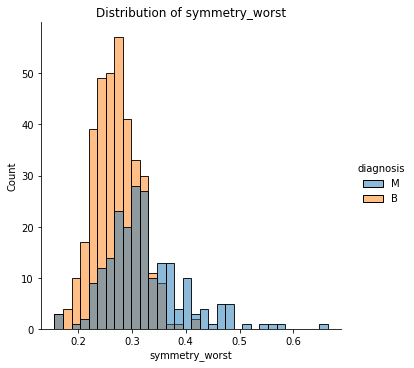

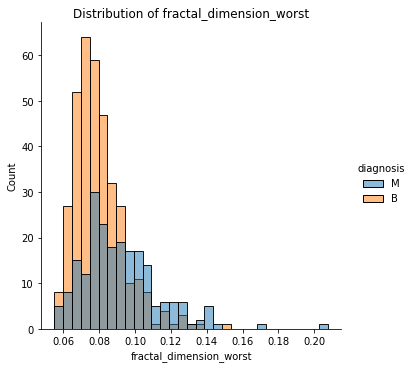

In [12]:
for col in float_data.columns:
    sns.displot(data=data, x=col, hue='diagnosis').set(title=f'Distribution of {col}')

#### Outlier

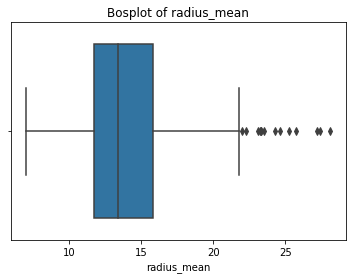

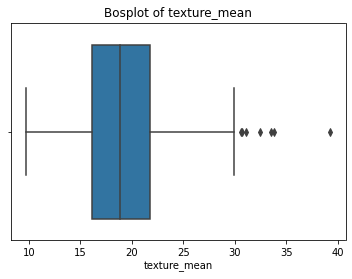

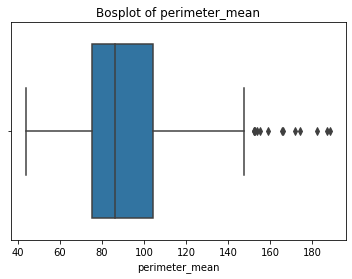

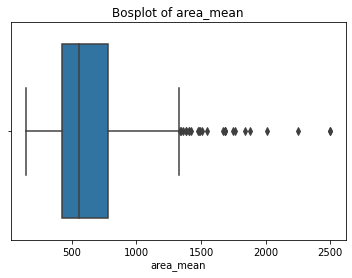

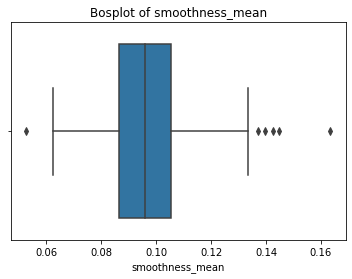

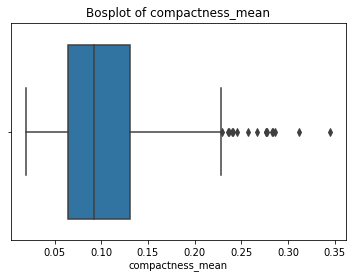

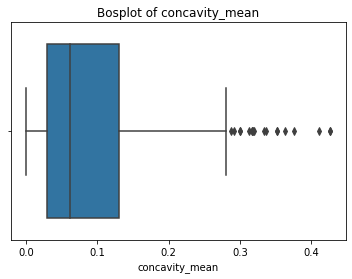

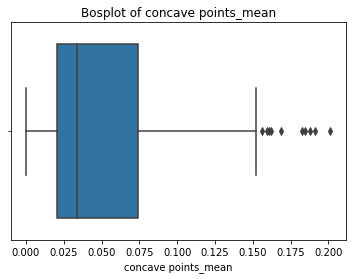

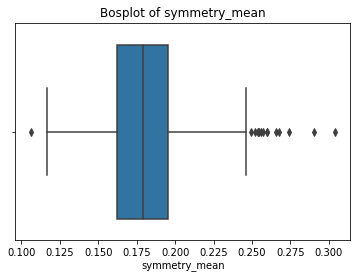

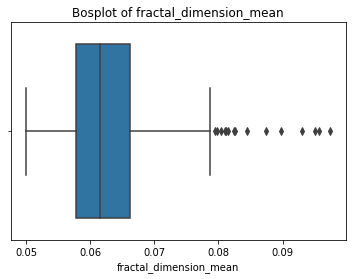

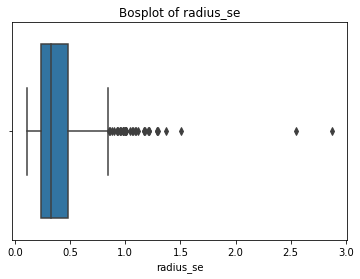

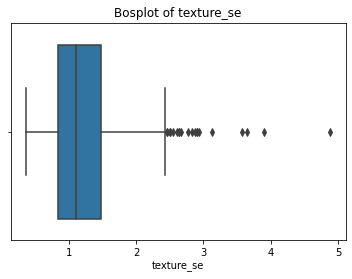

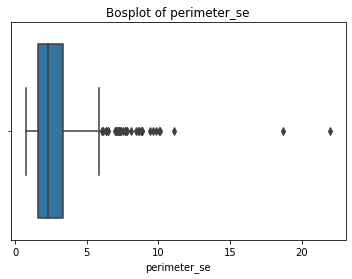

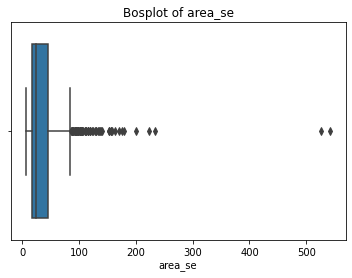

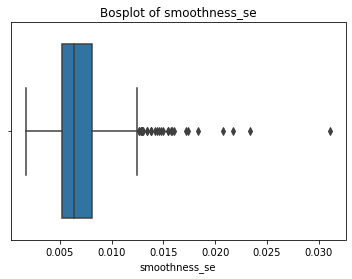

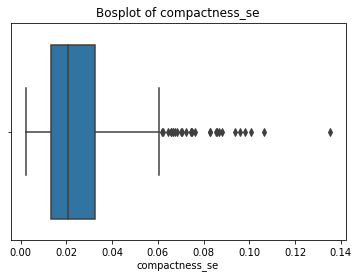

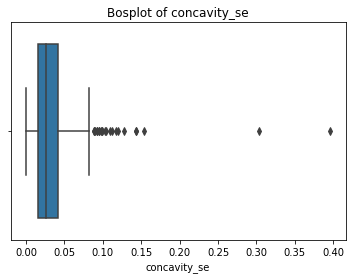

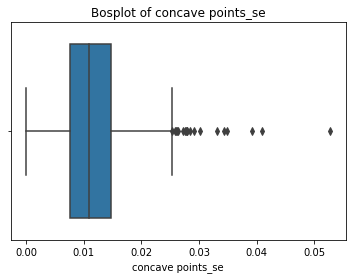

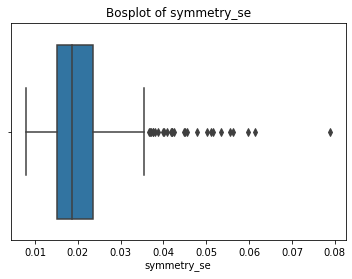

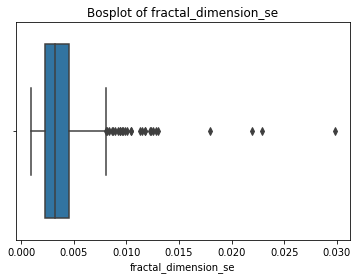

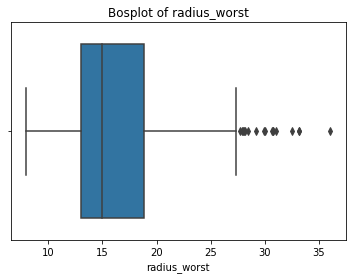

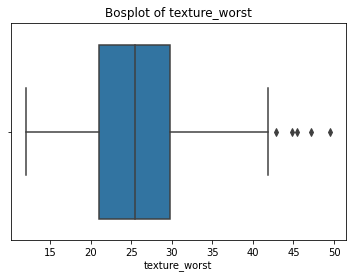

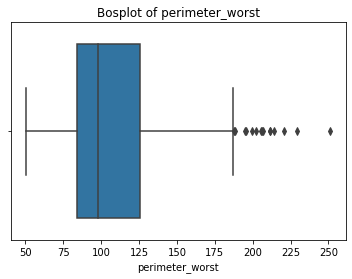

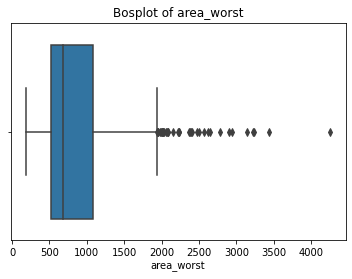

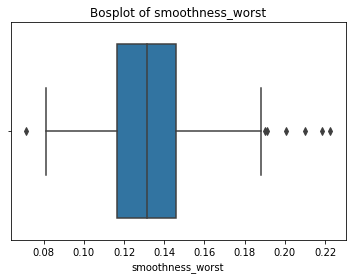

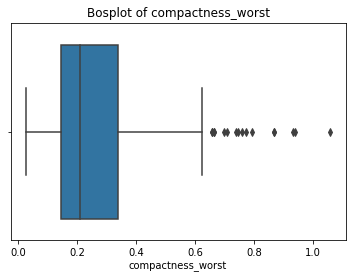

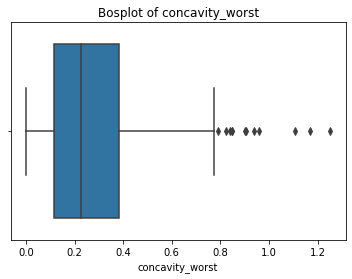

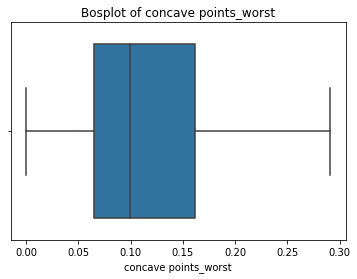

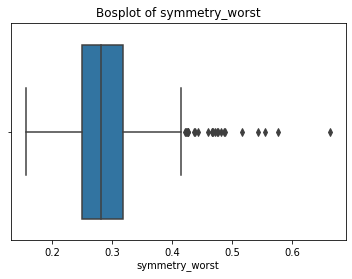

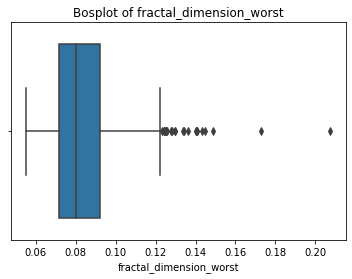

In [14]:
for col in float_data.columns:
    sns.boxplot(data=data, x=col).set(title=f'Bosplot of {col}')
    plt.show()

##### View with log transformation

In [13]:
float_log = float_data.apply(lambda x: np.log(x))
# float_log = float_log.apply(lambda x: (x-min(x))/(max(x)-min(x)))

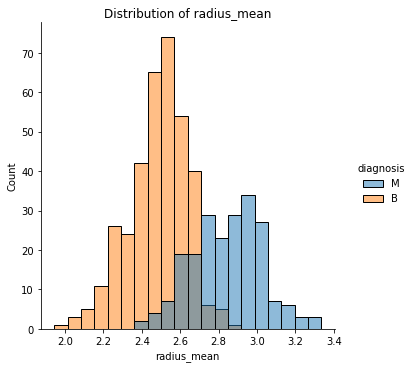

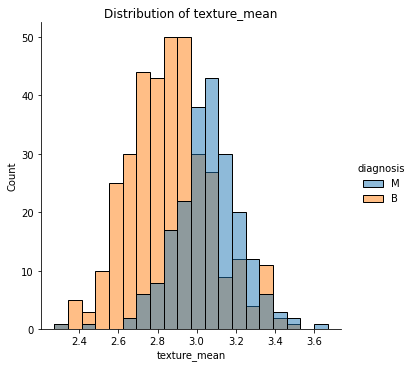

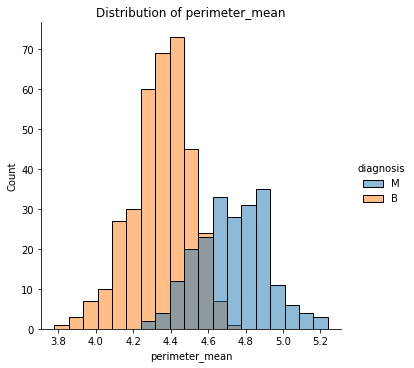

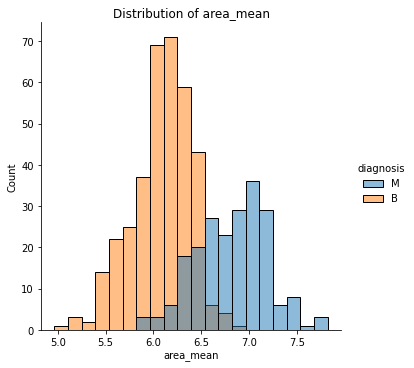

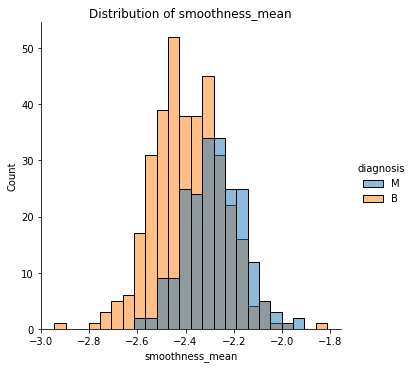

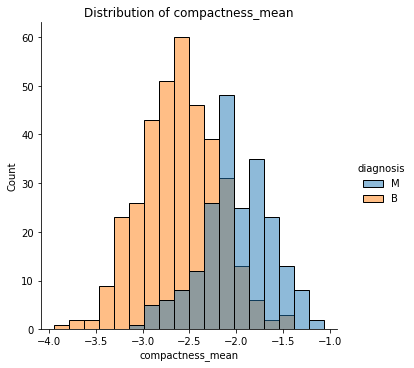

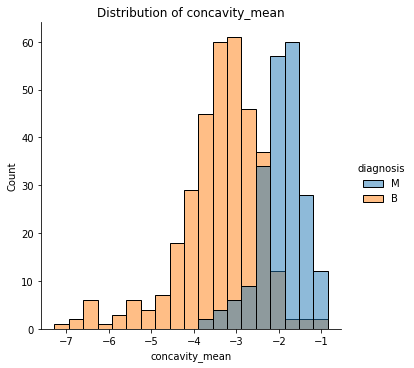

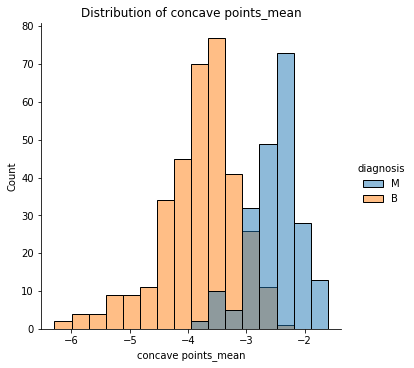

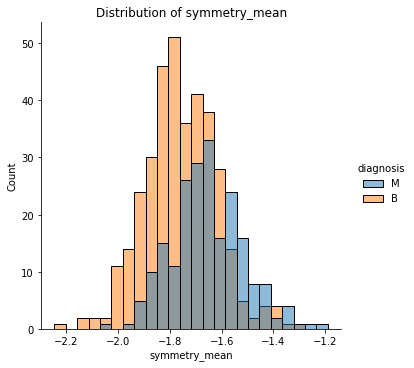

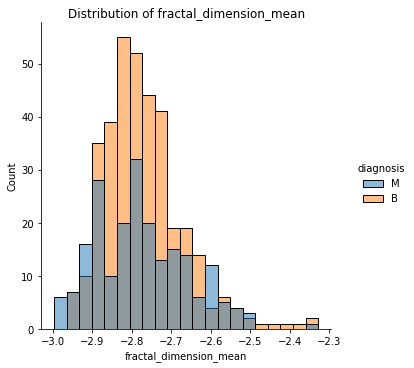

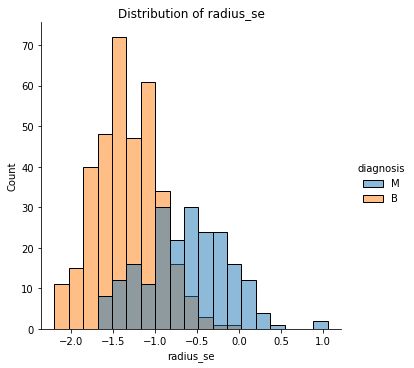

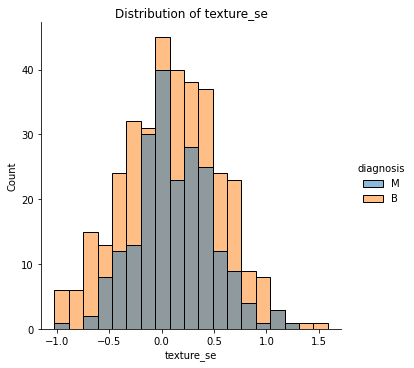

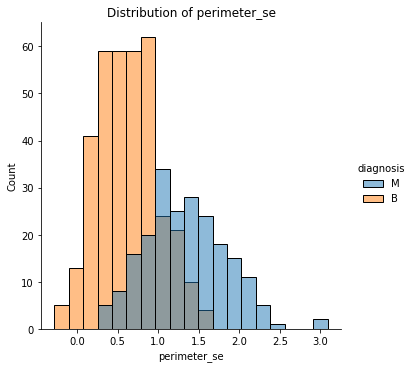

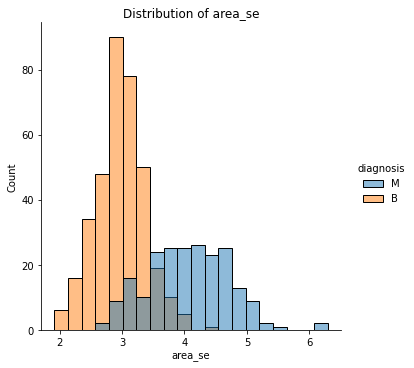

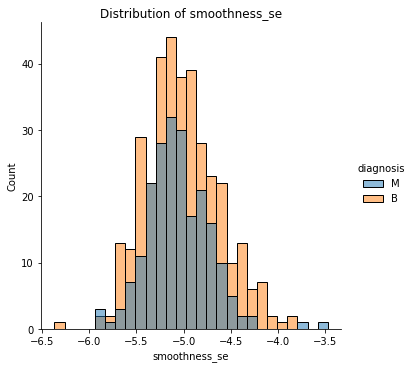

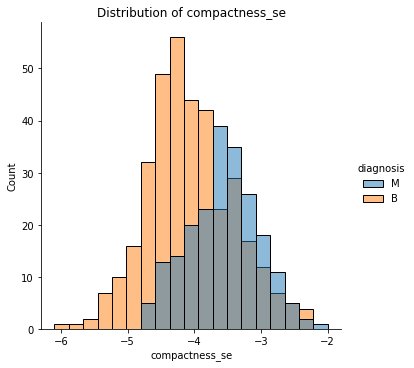

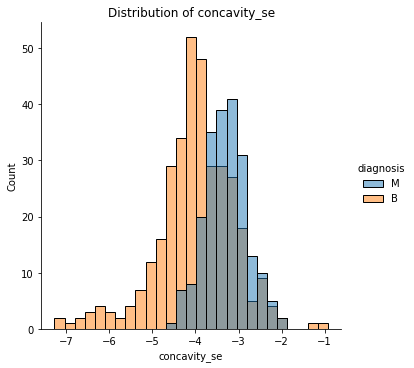

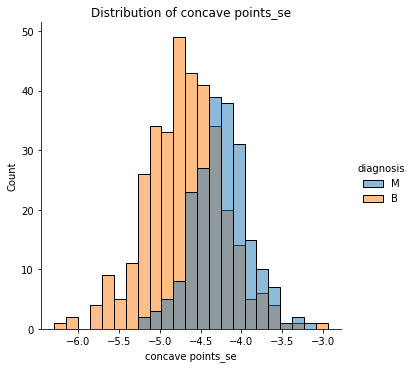

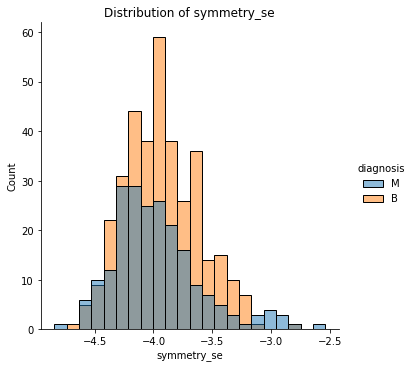

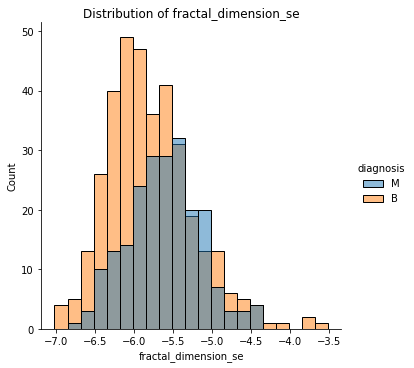

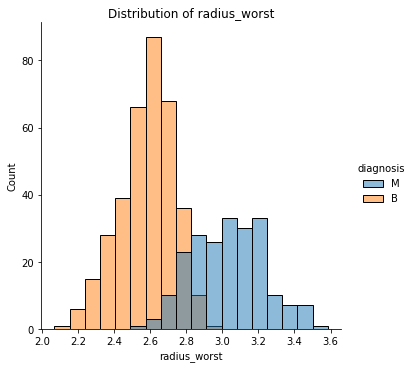

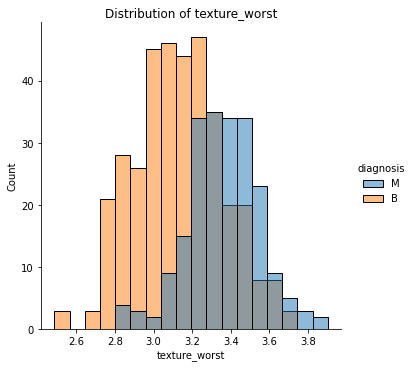

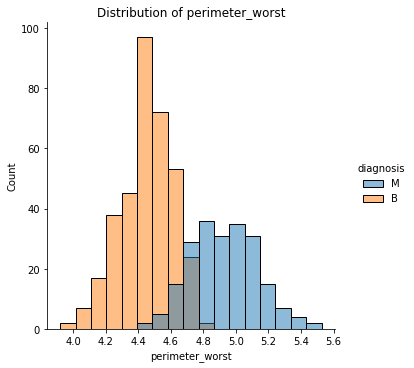

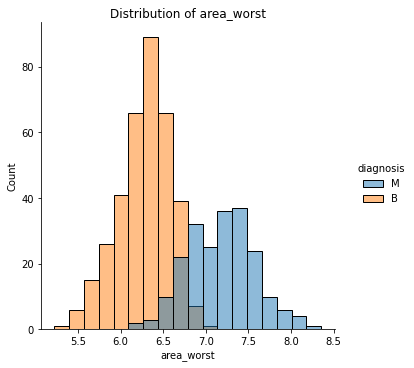

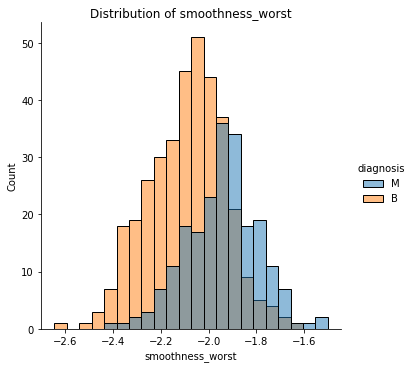

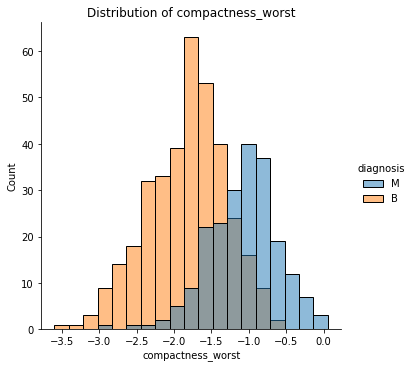

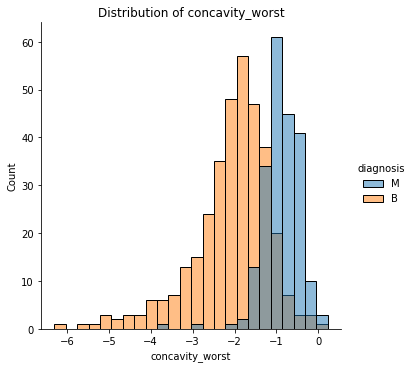

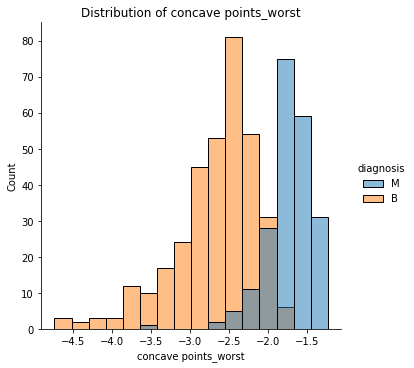

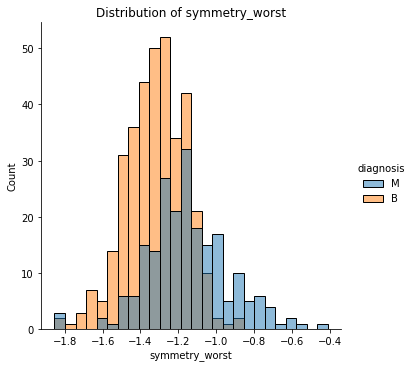

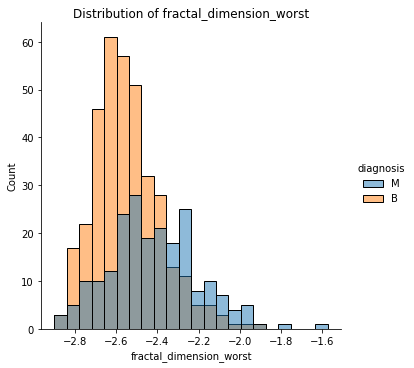

In [14]:
for col in float_log.columns:
    sns.displot( x=float_log[col], hue=data['diagnosis']).set(title=f'Distribution of {col}')

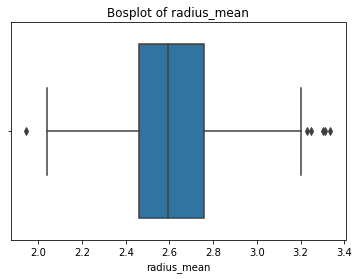

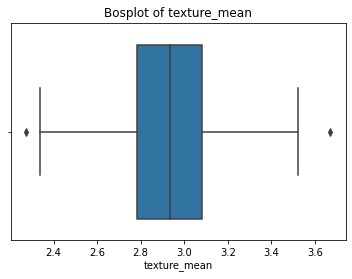

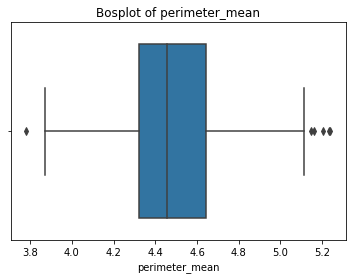

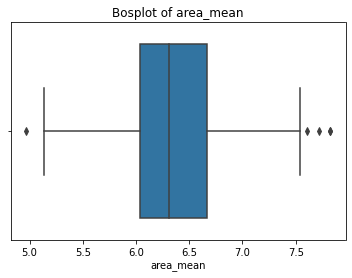

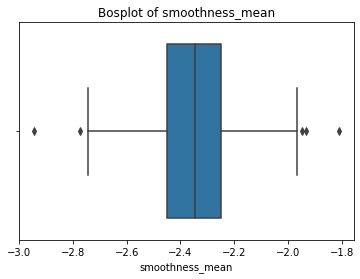

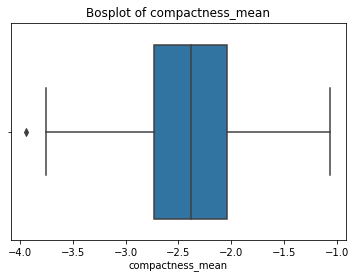

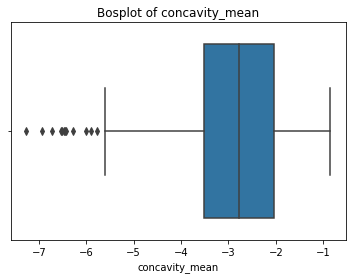

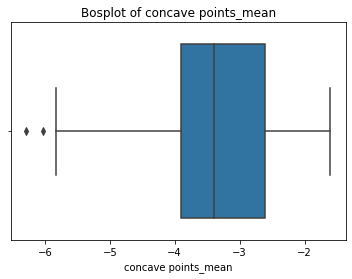

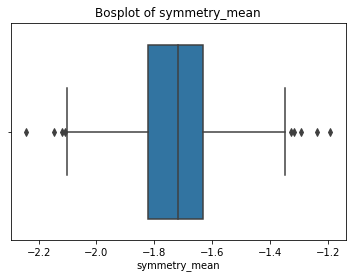

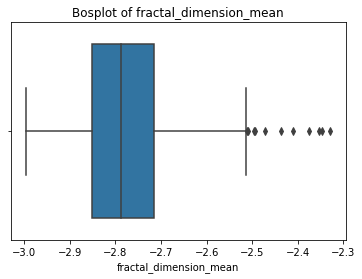

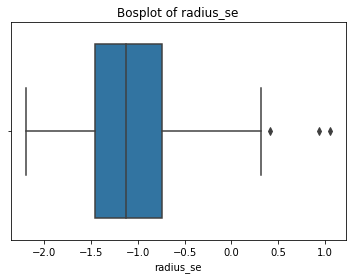

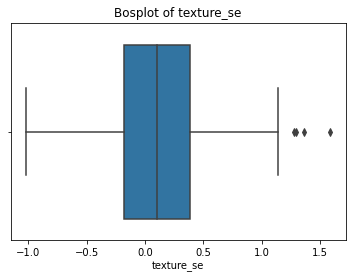

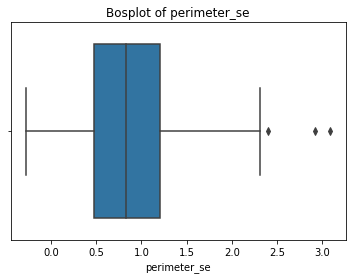

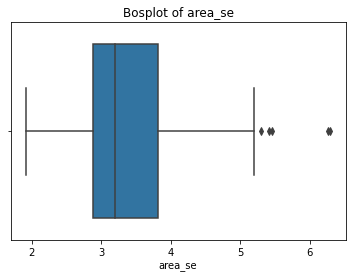

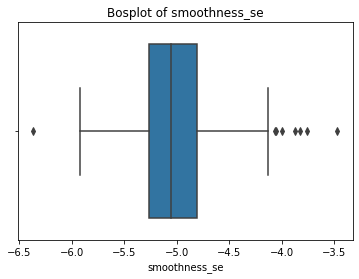

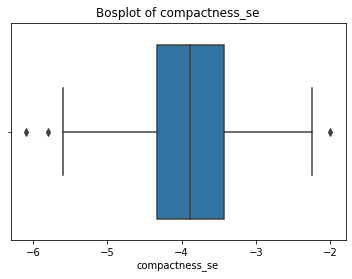

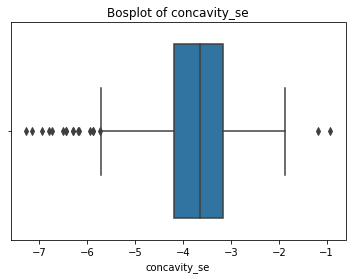

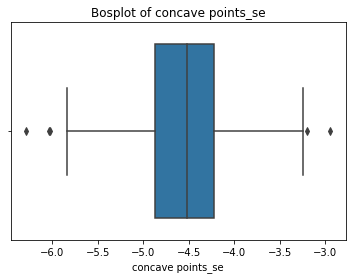

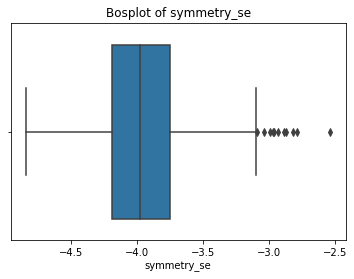

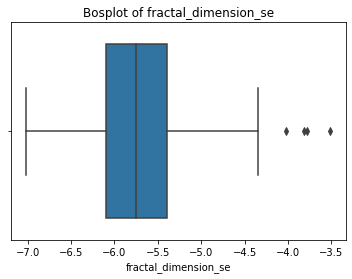

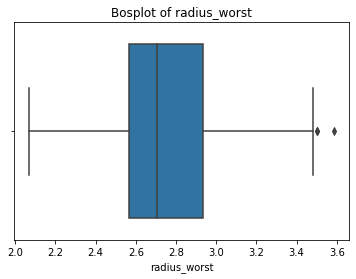

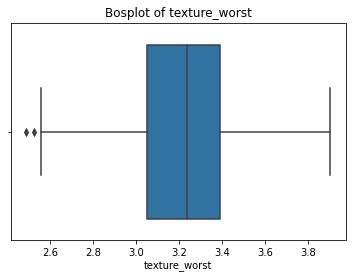

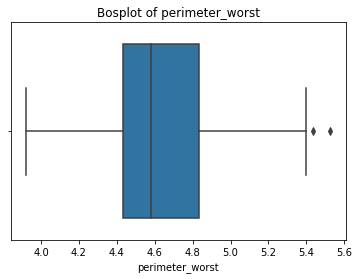

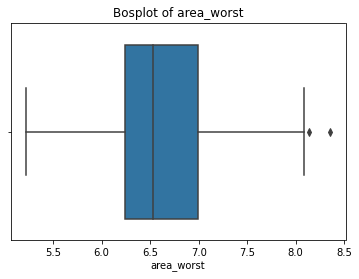

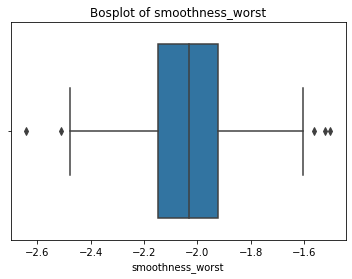

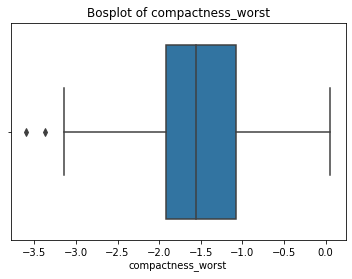

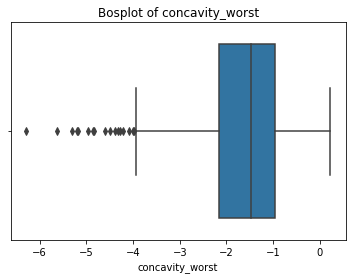

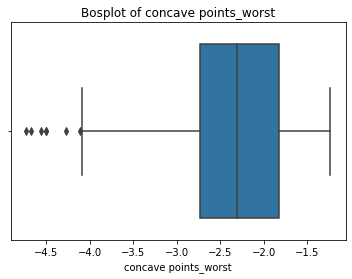

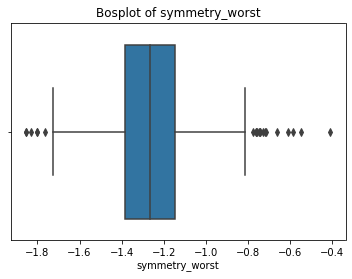

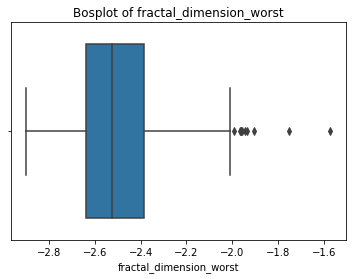

In [21]:
for col in float_log.columns:
    sns.boxplot(data=float_log, x=col).set(title=f'Bosplot of {col}')
    plt.show()

### Correlation

<AxesSubplot:>

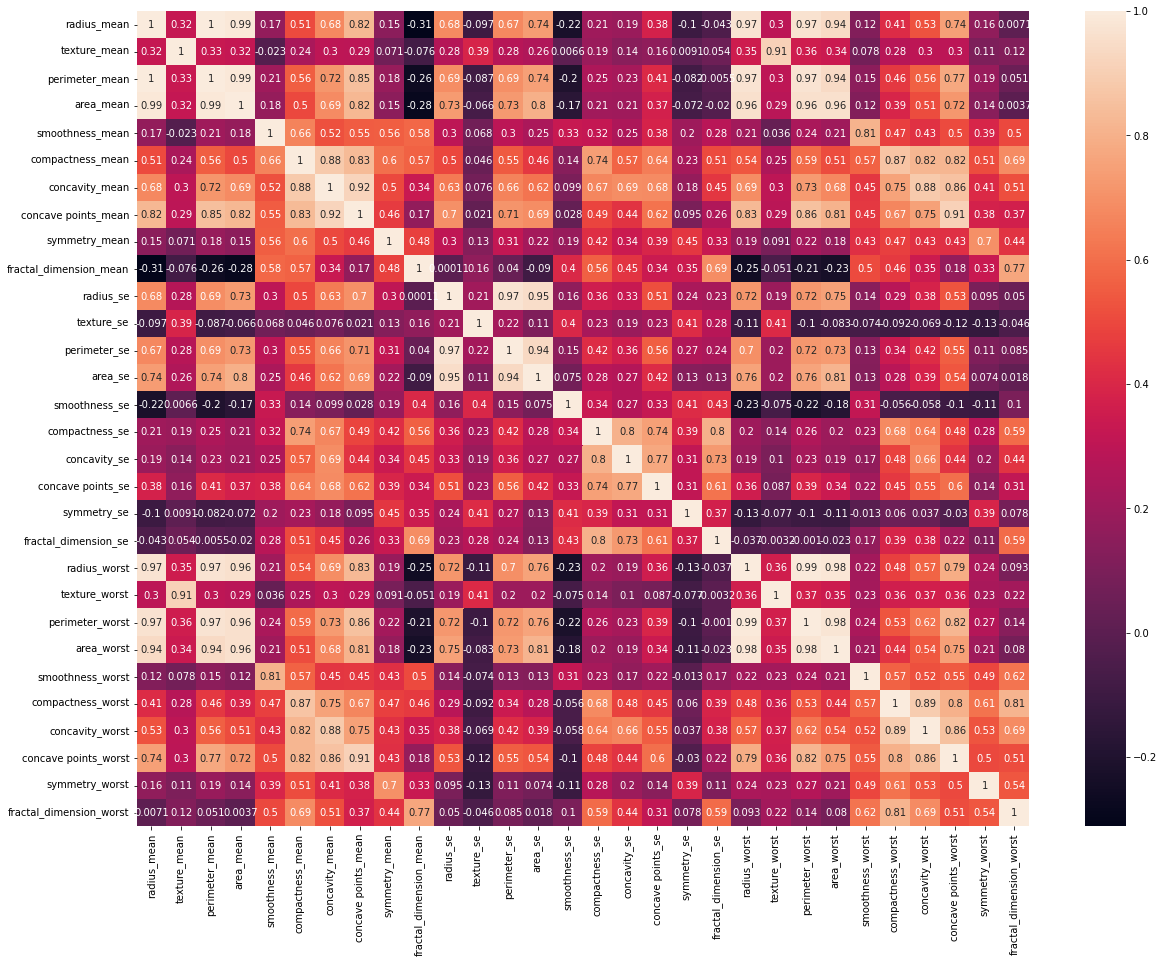

In [18]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(float_data.corr(), ax=ax, annot=True)

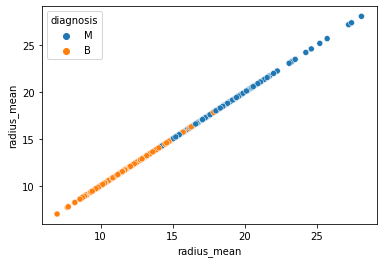

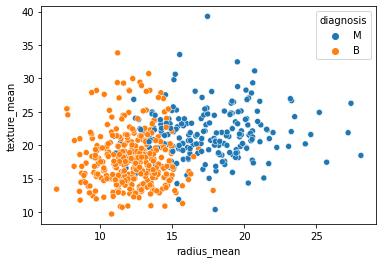

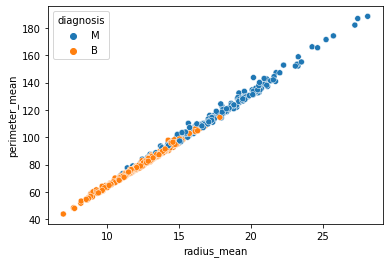

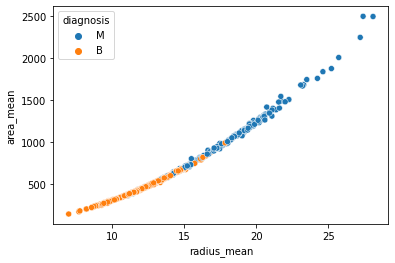

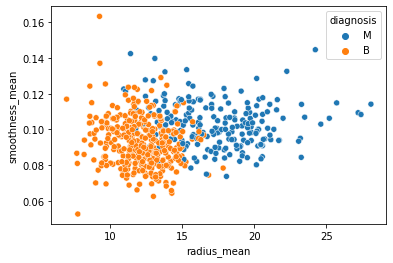

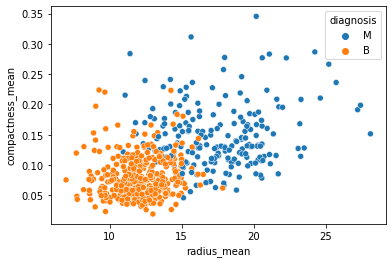

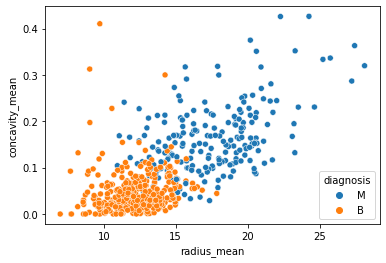

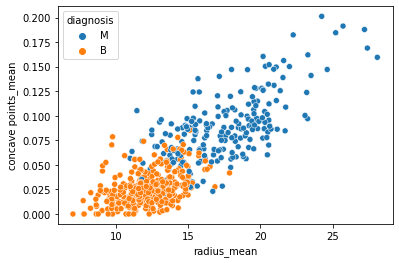

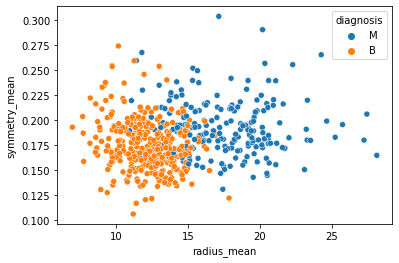

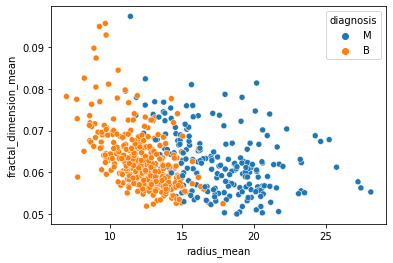

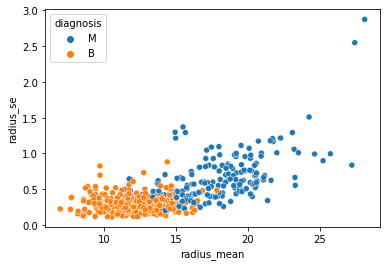

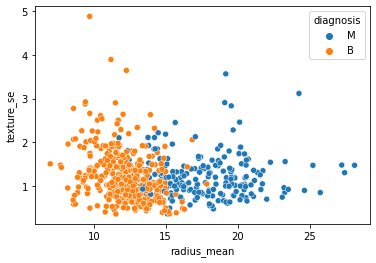

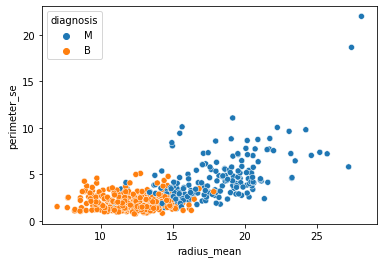

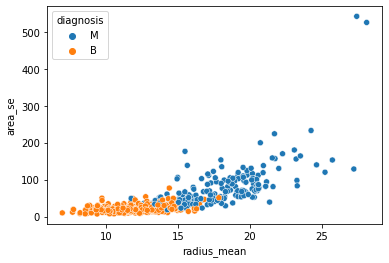

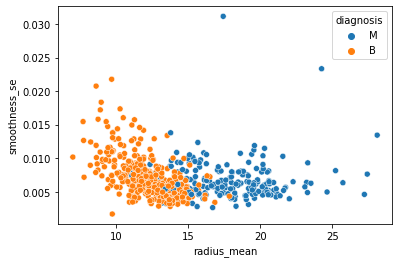

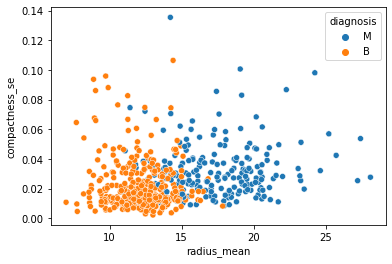

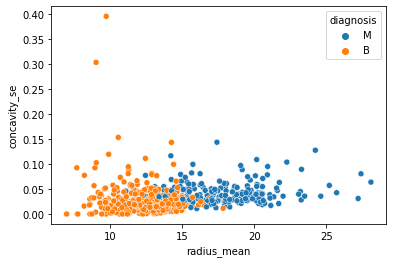

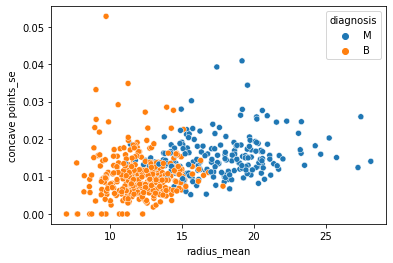

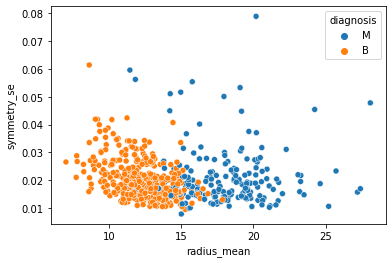

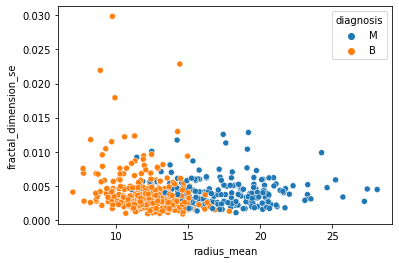

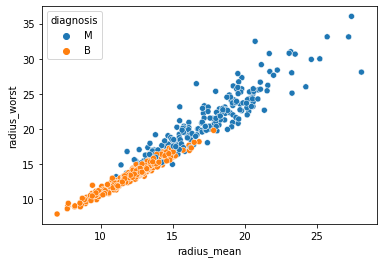

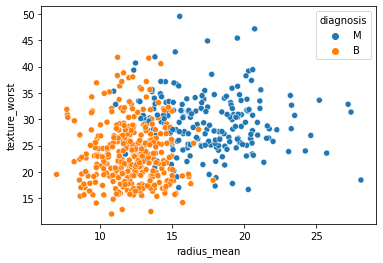

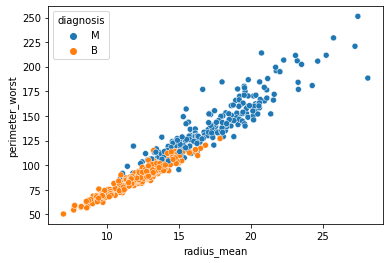

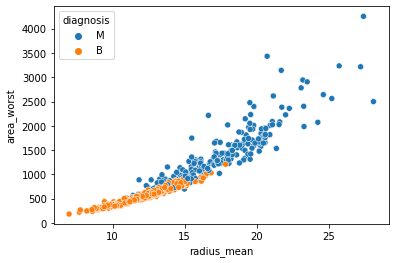

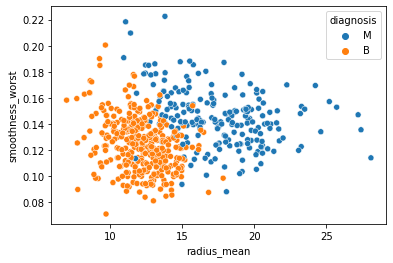

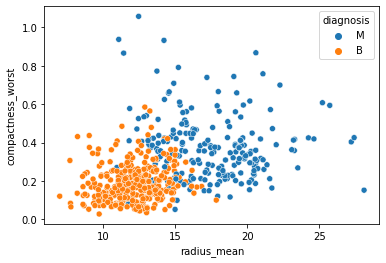

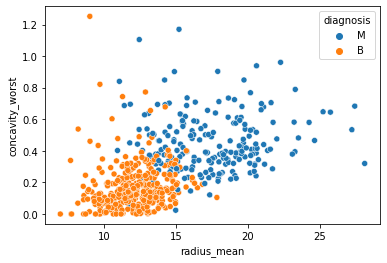

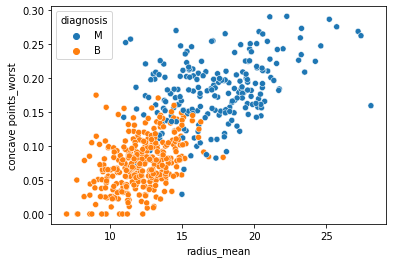

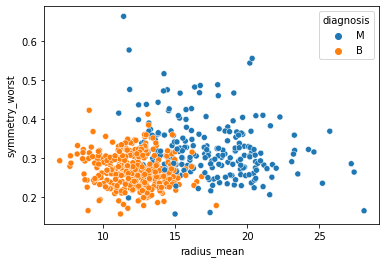

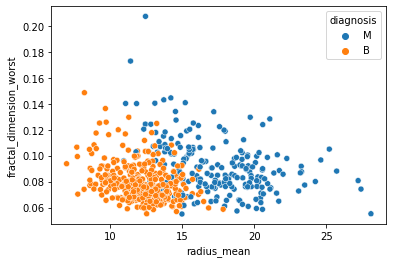

In [19]:
for col in float_data.columns:
    sns.scatterplot(y=float_data[col], x=float_data['radius_mean'], hue=data['diagnosis'])
    plt.show()

##### Get all correlations into a dict

In [17]:
corr = float_data.corr()
corr_obj = {}
for col in float_data.columns:
    corr_obj[col] = corr[col][(corr[col]>=0.9) & (corr[col]<1) ].to_dict()

In [79]:
print(corr_obj)

{'radius_mean': {'perimeter_mean': 0.9978552814938113,
  'area_mean': 0.9873571700566119,
  'radius_worst': 0.9695389726112053,
  'perimeter_worst': 0.9651365139559878,
  'area_worst': 0.9410824595860459},
 'texture_mean': {'texture_worst': 0.9120445888404215},
 'perimeter_mean': {'radius_mean': 0.9978552814938113,
  'area_mean': 0.9865068039913906,
  'radius_worst': 0.9694763634663142,
  'perimeter_worst': 0.9703868870426388,
  'area_worst': 0.9415498080023057},
 'area_mean': {'radius_mean': 0.9873571700566119,
  'perimeter_mean': 0.9865068039913906,
  'radius_worst': 0.9627460860470841,
  'perimeter_worst': 0.959119574355266,
  'area_worst': 0.9592133256499006},
 'smoothness_mean': {},
 'compactness_mean': {},
 'concavity_mean': {'concave points_mean': 0.9213910263788594},
 'concave points_mean': {'concavity_mean': 0.9213910263788594,
  'concave points_worst': 0.9101553142985934},
 'symmetry_mean': {},
 'fractal_dimension_mean': {},
 'radius_se': {'perimeter_se': 0.9727936770160752,
